# Lending Club Case Study

## Business Understanding

You work for a __consumer finance company__ which specialises in lending various types of loans to urban customers. <br> When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile. <br>


Two types of risks are associated with the bank’s decision:
- If the applicant is __likely to repay the loan__, then not approving the loan results in a loss of business to the company

- If the applicant is not __likely to repay the loan__, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company


The data given below contains the information about past loan applicants and whether they ‘defaulted’ or not. <br> The aim is to identify patterns which indicate if a person is likely to default,which may be used for taking actions such as denying the loan,<br> reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc.

<br>

When a person applies for a loan, there are two types of decisions that could be taken by the company:

- __Loan accepted__: If the company approves the loan, there are 3 possible scenarios described below:

    - __Fully paid__: Applicant has fully paid the loan (the principal and the interest rate)

    - __Current__: Applicant is in the process of paying the instalments, i.e. the tenure of the loan is not yet completed. These candidates are not labelled as 'defaulted'.

    - __Charged-off__: Applicant has not paid the instalments in due time for a long period of time, i.e. he/she has defaulted on the loan 

- __Loan rejected__: The company had rejected the loan (because the candidate does not meet their requirements etc.). Since the loan was rejected, there is no transactional history of those applicants with the company and so this data is not available with the company (and thus in this dataset)


## Business Objectives

This company is the largest online loan marketplace, facilitating personal loans, business loans, and financing of medical procedures.<br> Borrowers can easily access lower interest rate loans through a fast online interface.

Like most other lending companies, lending loans to ‘risky’ applicants is the largest source of financial loss (called credit loss). The credit loss is the amount of money lost by the lender when the borrower refuses to pay or runs away with the money owed. In other words, borrowers who default cause the largest amount of loss to the lenders. In this case, the customers labelled as 'charged-off' are the 'defaulters'. 

If one is able to identify these risky loan applicants, then such loans can be reduced thereby cutting down the amount of credit loss. Identification of such applicants using EDA is the aim of this case study.

In other words, the company wants to understand the __driving factors (or driver variables)__ behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment. 

To develop your understanding of the domain, you are advised to independently research a little about risk analytics (understanding the types of variables and their significance should be enough).


In [1]:
import pandas as pd 
import numpy as np 
from collections import Counter
import seaborn as sns 
import matplotlib.pyplot as plt 
import warnings
import matplotlib.style as style
import re

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_colwidth', 500)
pd.set_option('display.max_rows', 500)


sns.set_style("darkgrid")
plt.rcParams["figure.figsize"] = (12,8)


In [2]:
style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

### Load Data and check basic statistics

In [3]:
# Load description
df_description = pd.read_excel('../Data/Data_Dictionary.xlsx')

In [4]:
df_description

,LoanStatNew,Description
0,acc_now_delinq,The number of accounts on which the borrower is now delinquent.
1,acc_open_past_24mths,Number of trades opened in past 24 months.
2,addr_state,The state provided by the borrower in the loan application
3,all_util,Balance to credit limit on all trades
4,annual_inc,The self-reported annual income provided by the borrower during registration.
5,annual_inc_joint,The combined self-reported annual income provided by the co-borrowers during registration
6,application_type,Indicates whether the loan is an individual application or a joint application with two co-borrowers
7,avg_cur_bal,Average current balance of all accounts
8,bc_open_to_buy,Total open to buy on revolving bankcards.
9,bc_util,Ratio of total current balance to high credit/credit limit for all bankcard accounts.


In [5]:
loan_df = pd.read_csv('../Data/loan.csv')
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,...,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=1077501,Borrower added on 12/22/11 > I need to upgrade my business technologies.<br>,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.action?loan_id=1077430,Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike. I only need this money because the deal im looking at is to good to pass up.<br><br> Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike.I only need this money because the deal im looking at is to good to pas...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=1077175,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=1076863,"Borrower added on 12/21/11 > to pay for property tax (borrow from friend, need to pay back) & central A/C need to be replace. I'm very

In [6]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [7]:
loan_df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,14035.000000,2786.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39661.0,0.0,39717.0,0.0,0.0,0.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39661.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,35.900962,69.698134,9.294408,0.055065,13382.528086,22.088828,51.227887,50.989768,12153.596544,11567.149118,9793.348813,2263.663172,1.363015,95.221624,12.406112,2678.826162,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,22.020060,43.822529,4.400282,0.237200,15885.016641,11.401709,375.172839,373.824457,9042.040766,8942.672613,7065.522127,2608.111964,7.289979,688.744771,148.671593,4447.136012,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,18.000000,22.000000,6.000000,0.000000,3703.000000,13.000000,0.000000,0.000000,5576.930000,5112.310000,4600.000000,662.180000,0.000000,0.000000,0.000000,218.680000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [8]:
loan_df.describe(include=['object']).T

,count,unique,top,freq
term,39717,2,36 months,29096
int_rate,39717,371,10.99%,956
grade,39717,7,B,12020
sub_grade,39717,35,B3,2917
emp_title,37258,28820,US Army,134
emp_length,38642,11,10+ years,8879
home_ownership,39717,5,RENT,18899
verification_status,39717,3,Not Verified,16921
issue_d,39717,55,Dec-11,2260
loan_status,39717,3,Fully Paid,32950


__As it looks, there are several columns which have either entirely empty or have majorly NaN values__.
Lets check these columns

In [9]:
# sns.heatmap(loan_df.isnull(), cbar=False)
# plt.show()

In [10]:
percent_missing = loan_df.isnull().sum() * 100 / len(loan_df)
missing_value_df = pd.DataFrame({'column_name': loan_df.columns,
                                 'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing',ascending=False, inplace=True)
missing_value_df = missing_value_df.reset_index(drop=True)                          

__We will identify columns having more than 50 % of its values as missing and we will remove these columns from our main DataFrame before proceeding further.__

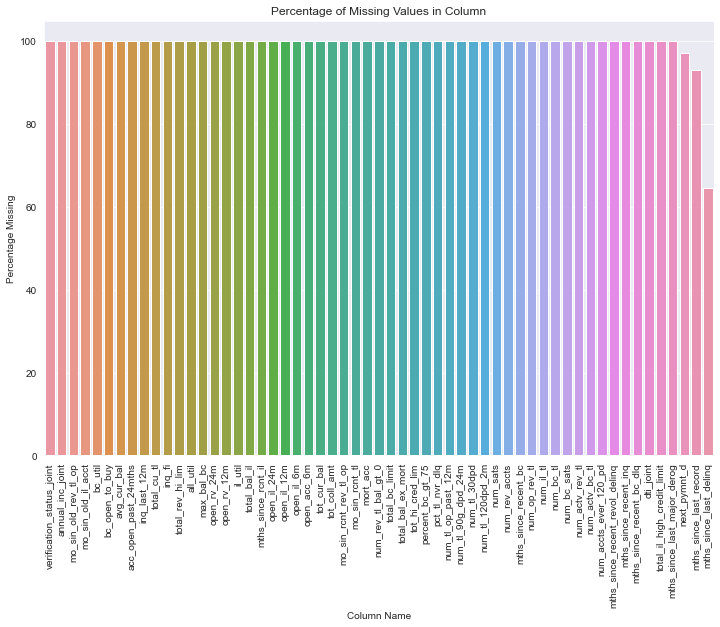

In [11]:
plt.title('Percentage of Missing Values in Column')
sns.barplot(x='column_name',y='percent_missing',data=missing_value_df[missing_value_df.percent_missing > 50])
# missing_value_df[missing_value_df.percent_missing > 90].plot.bar(x='column_name',y='percent_missing')
plt.ylabel('Percentage Missing')
plt.xlabel('Column Name')
plt.xticks(rotation=90)
plt.show()

In [12]:
columns_to_be_removed = missing_value_df[missing_value_df.percent_missing > 50]['column_name'].to_list()
print(f'There are {len(columns_to_be_removed)} columns having more than 50% values as NaN')

There are 57 columns having more than 50% values as NaN


In [13]:
#Remove NaN columns
loan_df = loan_df[loan_df.columns[~loan_df.columns.isin(columns_to_be_removed)]]

In [14]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 54 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

__Now, we are left with 56 non-null columns and 39,717 Rows.__ 

__Lets check the missing values in the remaining columns__

In [15]:
columns_with_a_null_value = loan_df.columns[loan_df.isna().any()]

In [16]:
print('The Columns with atleast one null value are:')
print('--------------------------------------------')
print([col for col in columns_with_a_null_value])

The Columns with atleast one null value are:
--------------------------------------------
['emp_title', 'emp_length', 'desc', 'title', 'revol_util', 'last_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med', 'chargeoff_within_12_mths', 'pub_rec_bankruptcies', 'tax_liens']


__Lets check each column separately and handle the missing values__

_`emp_title`_

In [17]:
loan_df.emp_title.describe()

count       37258
unique      28820
top       US Army
freq          134
Name: emp_title, dtype: object

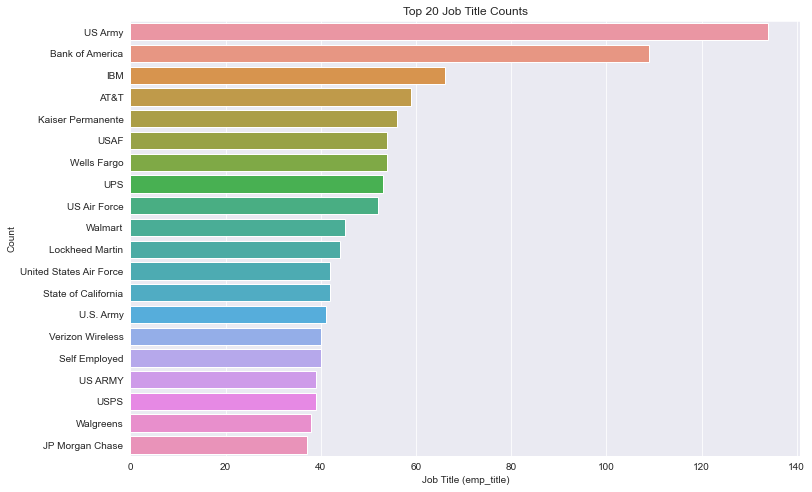

In [18]:
plt.title('Top 20 Job Title Counts')
sns.countplot(y = 'emp_title',data =loan_df,order=pd.value_counts(loan_df['emp_title']).iloc[:20].index)
# missing_value_df[missing_value_df.percent_missing > 90].plot.bar(x='column_name',y='percent_missing')
plt.ylabel('Count')
plt.xlabel('Job Title (emp_title)')
plt.show()

Lets fill the missing values with `missing` in the emp_title column

In [19]:
loan_df.emp_title.fillna('missing',inplace=True)

_`emp_length`_

In [20]:
loan_df.emp_length.describe()

count         38642
unique           11
top       10+ years
freq           8879
Name: emp_length, dtype: object

In [21]:
loan_df[loan_df.emp_length.isna()].sample(10)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
25410,565494,727535,1750,1750,1750.0,36 months,7.51%,54.45,A,A4,missing,NaN,RENT,9192.0,Verified,Sep-10,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=565494,NaN,debt_consolidation,consolidation,480xx,MI,20.76,0,Dec-96,0,7,1,3117,40%,13,f,0.0,0.0,1945.136841,1945.14,1750.00,195.14,0.0,0.00,0.0000,Jan-13,535.93,Jan-16,0.0,1,INDIVIDUAL,0,0.0,0,1.0,0.0
6162,973107,1195089,5000,5000,5000.0,36 months,12.42%,167.08,B,B4,missing,NaN,RENT,20400.0,Verified,Oct-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=973107,NaN,debt_consolidation,Resource,452xx,OH,8.59,0,Mar-90,1,5,1,4776,85.30%,10,f,0.0,0.0,5421.784712,5421.78,5000.00,421.78,0.0,0.00,0.0000,Jul-12,4087.66,Aug-15,0.0,1,INDIVIDUAL,0,0.0,0,1.0,0.0
6391,969555,1190979,1000,1000,1000.0,36 months,8.90%,31.76,A,A5,missing,NaN,RENT,12480.0,Not Verified,Sep-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=969555,Borrower added on 09/27/11 > Consolidation of credit accounts<br/>null,debt_consolidation,Debt Consolidation Loan,801xx,CO,6.35,0,Dec-05,0,4,0,599,24%,5,f,0.0,0.0,1143.138726,1143.14,1000.00,143.14,0.0,0.00,0.0000,Oct-14,7.65,Mar-15,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
22837,623034,798490,1400,1400,1375.0,36 months,6.91%,43.18,A,A5,missing,NaN,OWN,8628.0,Not Verified,Dec-10,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=623034,NaN,credit_card,Credit Card Refinance,287xx,NC,21.97,0,May-00,1,8,1,3330,33.60%,11,f,0.0,0.0,1521.506079,1494.34,1400.00,121.51,0.0,0.00,0.0000,Aug-12,702.55,Aug-12,0.0,1,INDIVIDUAL,0,0.0,0,1.0,0.0
439,1063912,1296491,8250,8250,8250.0,36 months,7.51%,256.67,A,A3,missing,NaN,MORTGAGE,31500.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=1063912,"Borrower added on 12/09/11 > i am looking ro conslidate my credit card debts,and i have always made on time payments to my creditors<br>",debt_consolidation,do over,218xx,MD,17.87,0,Dec-81,4,17,0,7521,10.40%,37,f,0.0,0.0,9239.889998,9239.89,8250.00,989.89,0.0,0.00,0.0000,Dec-14,278.92,Dec-14,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
30689,494288,632748,5600,5600,5575.0,36 months,13.48%,189.98,C,C3,missing,NaN,RENT,11688.0,Not Verified,Apr-10,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=494288,Borrower added on 04/14/10 > This loan is for me to jumpstart my retail internet business. The domain name is already purchased. This loan will be used to purchase a shopping cart web design template and a custom logo designed for the site as well. I have a continuous monthly income that will never decrease. I will make a good borrower because this loan will increase my monthly income through sales on my website. I fully expect to have this loan payed off much sooner than the 3 yr tim...,small_business,online business loan,591xx,MT,0.00,0,Oct-98,0,2,0,0,0%,11,f,0.0,0.0,6598.552873,6569.10,5600.00,998.55,0.0,0.00,0.0000,Feb-12,2815.29,Feb-12,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4658,998499,1223660,5800,5800,5800.0,36 months,6.62%,178.09,A,A2,missing,NaN,RENT,26988.0,Verified,Oct-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.action?loan_id=998499,"Borrower added on 10/21/11 > The funds would be used to apply for marriage license, receiption, and a short honeymoon., and to establish a resident.<br/>",wedding,Wedding,

__If we look at the emp_length column that is employment length in years. It has a missing value wherever the emp_title has a missing value. It can be the case that the customer in the application either has no job or has < 1 year of employment. __

We will remove these rows.

In [22]:
loan_df = loan_df[~loan_df.emp_length.isna()]

`desc`

In [23]:
print("Missing values in \"desc\" :",loan_df["desc"].isna().sum())
print("------------------------------------------------------------")
print(loan_df["desc"][1])
print("------------------------------------------------------------")
print(loan_df["title"][1])

Missing values in "desc" : 12495
------------------------------------------------------------
  Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike. I only need this money because the deal im looking at is to good to pass up.<br><br>  Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike.I only need this money because the deal im looking at is to good to pass up. I have finished college with an associates degree in business and its takingmeplaces<br>
------------------------------------------------------------
bike


__The title columns is a tag given to the loan application according to the description column.__
_We will drop this columns and keep "title" column._

In [24]:
loan_df.drop(columns=['desc'],inplace=True)

`title`

In [25]:
loan_df.title.describe()

count                  38632
unique                 19148
top       Debt Consolidation
freq                    2144
Name: title, dtype: object

In [26]:
loan_df.title.head()

0                Computer
1                    bike
2    real estate business
3                personel
4                Personal
Name: title, dtype: object

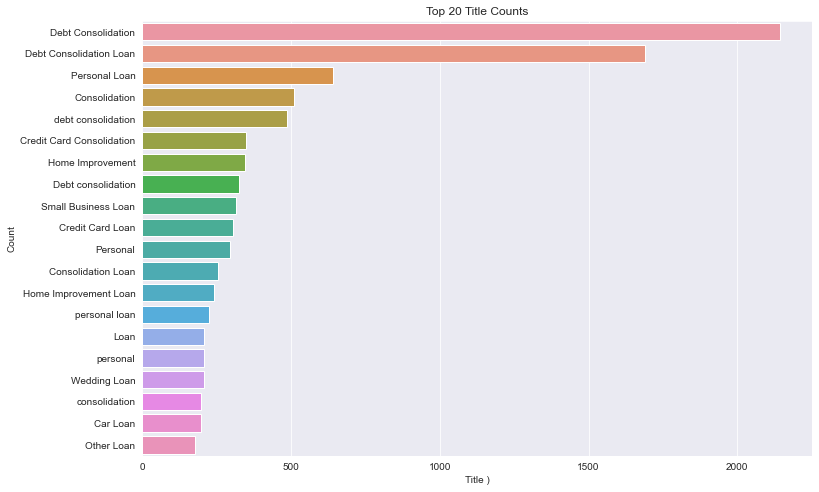

In [27]:
plt.title('Top 20 Title Counts')
sns.countplot(y = 'title',data =loan_df,order=pd.value_counts(loan_df['title']).iloc[:20].index)
# missing_value_df[missing_value_df.percent_missing > 90].plot.bar(x='column_name',y='percent_missing')
plt.ylabel('Count')
plt.xlabel('Title )')
plt.show()

In [28]:
# remove 'loan' from the column title as it is redundant
# loan_df['title'] = loan_df.title.str.replace('Loan|loan', '')

# def replace_loan_string(text):
#     if len(str(text)) >= 2:
#         return str(text).replace('Loan', '')


# loan_df['title'] = loan_df.title.apply(replace_loan_string)

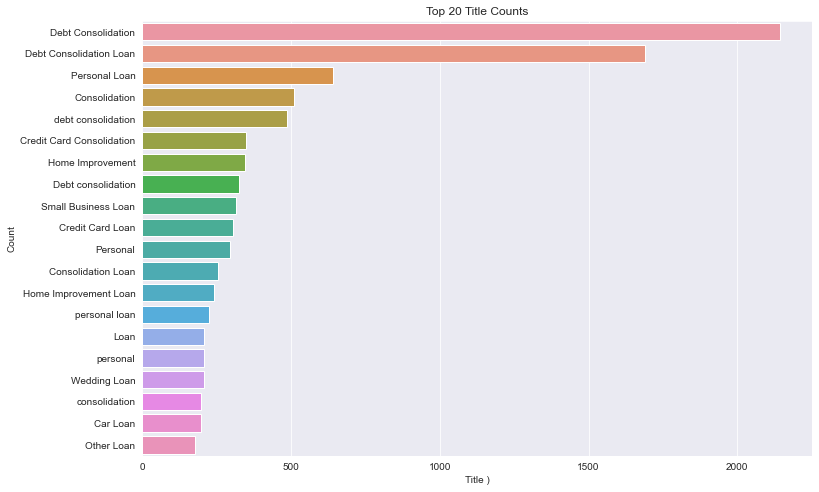

In [29]:
plt.title('Top 20 Title Counts')
sns.countplot(y = 'title',data =loan_df,order=pd.value_counts(loan_df['title']).iloc[:20].index)
# missing_value_df[missing_value_df.percent_missing > 90].plot.bar(x='column_name',y='percent_missing')
plt.ylabel('Count')
plt.xlabel('Title )')
plt.show()

In [30]:
loan_df["title"].fillna(value = "missing",inplace=True)

'revol_util', 'last_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med', 'chargeoff_within_12_mths', 'pub_rec_bankruptcies', 'tax_liens

_`revol_util`_

In [31]:
loan_df.revol_util.describe()

count     38595
unique     1087
top          0%
freq        941
Name: revol_util, dtype: object

In [32]:
loan_df = loan_df[~loan_df["revol_util"].isna()]

In [33]:
loan_df=loan_df[~loan_df["last_pymnt_d"].isna()]
loan_df=loan_df[~loan_df["last_credit_pull_d"].isna()]

In [34]:
loan_df["collections_12_mths_ex_med"].unique()

array([ 0., nan])

In [35]:
loan_df["chargeoff_within_12_mths"].unique()

array([ 0., nan])

In [36]:
loan_df["tax_liens"].unique()

array([ 0., nan])

In [37]:
print(loan_df["pub_rec_bankruptcies"].unique())
print("----------------------")
print(loan_df["pub_rec_bankruptcies"].value_counts())

[ 0.  1.  2. nan]
----------------------
0.0    36272
1.0     1556
2.0        7
Name: pub_rec_bankruptcies, dtype: int64


In [38]:
list_cols = ['collections_12_mths_ex_med', 'chargeoff_within_12_mths', 'pub_rec_bankruptcies', 'tax_liens']
loan_df.drop(list_cols,axis=1,inplace=True)

In [39]:
loan_df.isna().sum()

id                         0
member_id                  0
loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_title                  0
emp_length                 0
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
pymnt_plan                 0
url                        0
purpose                    0
title                      0
zip_code                   0
addr_state                 0
dti                        0
delinq_2yrs                0
earliest_cr_line           0
inq_last_6mths             0
open_acc                   0
pub_rec                    0
revol_bal                  0
revol_util                 0
total_acc                  0
initial_list_status        0
out_prncp                  0
out_prncp_inv 

In [40]:
loan_df["zip_code"].describe()

count     38531
unique      822
top       100xx
freq        589
Name: zip_code, dtype: object

_There are 822 unique zip codes and it will be interesting to see analysis of this attribute with respect to the loan default status_

In [41]:
loan_df["addr_state"].describe()

count     38531
unique       50
top          CA
freq       6885
Name: addr_state, dtype: object

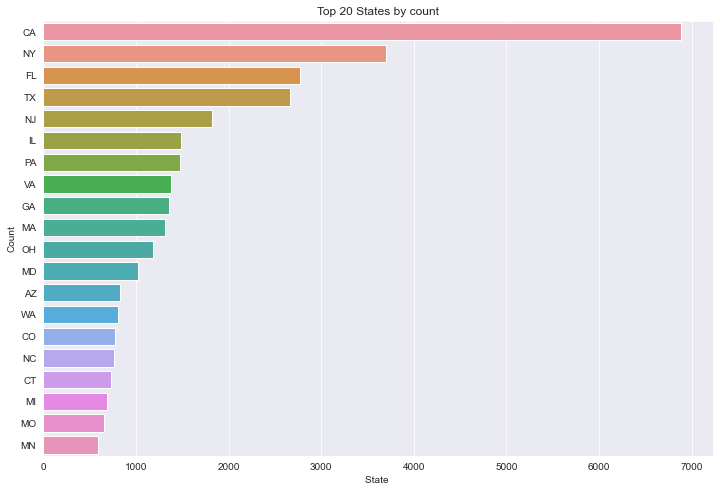

In [42]:
plt.title('Top 20 States by count')
sns.countplot(y = 'addr_state',data =loan_df,order=pd.value_counts(loan_df['addr_state']).iloc[:20].index)
# missing_value_df[missing_value_df.percent_missing > 90].plot.bar(x='column_name',y='percent_missing')
plt.ylabel('Count')
plt.xlabel('State ')
plt.show()

In [43]:
loan_df["pymnt_plan"].value_counts()

n    38531
Name: pymnt_plan, dtype: int64

In [44]:
loan_df["url"].unique()[:5]

array(['https://lendingclub.com/browse/loanDetail.action?loan_id=1077501',
       'https://lendingclub.com/browse/loanDetail.action?loan_id=1077430',
       'https://lendingclub.com/browse/loanDetail.action?loan_id=1077175',
       'https://lendingclub.com/browse/loanDetail.action?loan_id=1076863',
       'https://lendingclub.com/browse/loanDetail.action?loan_id=1075358'],
      dtype=object)

_Lets remove the URl and pymnt_plan columns as they do not add any information_

In [45]:
loan_df = loan_df.drop(columns=['pymnt_plan','url'])

In [46]:
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,policy_code,application_type,acc_now_delinq,delinq_amnt
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,missing,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,1,INDIVIDUAL,0,0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,bike,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,1,INDIVIDUAL,0,0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,missing,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,1,INDIVIDUAL,0,0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,personel,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,1,INDIVIDUAL,0,0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,other,Personal,972xx,OR,17.94,0,Jan-96,0,15,0,27783,53.90%,38,f,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,1,INDIVIDUAL,0,0


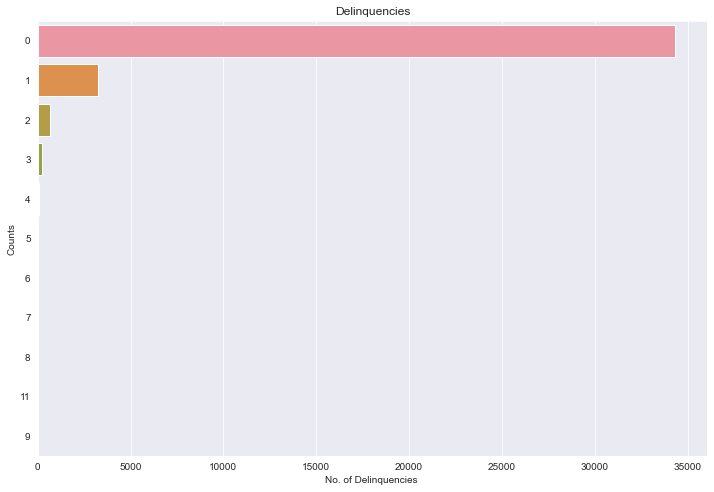

In [47]:
plt.title('Delinquencies')
sns.countplot(y = 'delinq_2yrs',data =loan_df,order=pd.value_counts(loan_df['delinq_2yrs']).iloc[:20].index)
# missing_value_df[missing_value_df.percent_missing > 90].plot.bar(x='column_name',y='percent_missing')
plt.ylabel('Counts')
plt.xlabel('No. of Delinquencies ')
plt.show()

In [48]:
loan_df["delinq_2yrs"].unique()

array([ 0,  2,  3,  1,  4,  6,  5,  8,  7,  9, 11], dtype=int64)

In [49]:
#Number of derogatory public records ->pub_rec

loan_df["pub_rec"].value_counts()

0    36547
1     1926
2       49
3        7
4        2
Name: pub_rec, dtype: int64

In [50]:
loan_df["initial_list_status"].value_counts()

f    38531
Name: initial_list_status, dtype: int64

In [51]:
loan_df = loan_df.drop(columns=['initial_list_status'])

In [52]:
loan_df["policy_code"].unique()

array([1], dtype=int64)

In [53]:
loan_df = loan_df.drop(columns=['policy_code'])

In [54]:
print(loan_df["application_type"].unique())
loan_df["application_type"].value_counts()

['INDIVIDUAL']


INDIVIDUAL    38531
Name: application_type, dtype: int64

In [55]:
loan_df["acc_now_delinq"].unique()

array([0], dtype=int64)

In [56]:
loan_df["delinq_amnt"].unique()

array([0], dtype=int64)

In [57]:
loan_df = loan_df.drop(columns=['application_type','acc_now_delinq','delinq_amnt'])

In [58]:
loan_df["funded_amnt"].unique()

array([ 5000,  2500,  2400, ...,   800, 13875, 22350], dtype=int64)

In [59]:
loan_df["funded_amnt_inv"].unique()

array([4975., 2500., 2400., ...,  200.,   75.,  150.])

In [60]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38531 entries, 0 to 39716
Data columns (total 42 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       38531 non-null  int64  
 1   member_id                38531 non-null  int64  
 2   loan_amnt                38531 non-null  int64  
 3   funded_amnt              38531 non-null  int64  
 4   funded_amnt_inv          38531 non-null  float64
 5   term                     38531 non-null  object 
 6   int_rate                 38531 non-null  object 
 7   installment              38531 non-null  float64
 8   grade                    38531 non-null  object 
 9   sub_grade                38531 non-null  object 
 10  emp_title                38531 non-null  object 
 11  emp_length               38531 non-null  object 
 12  home_ownership           38531 non-null  object 
 13  annual_inc               38531 non-null  float64
 14  verification_status   

In [61]:
loan_df.isna().sum()

id                         0
member_id                  0
loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_title                  0
emp_length                 0
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
purpose                    0
title                      0
zip_code                   0
addr_state                 0
dti                        0
delinq_2yrs                0
earliest_cr_line           0
inq_last_6mths             0
open_acc                   0
pub_rec                    0
revol_bal                  0
revol_util                 0
total_acc                  0
out_prncp                  0
out_prncp_inv              0
total_pymnt                0
total_pymnt_inv            0
total_rec_prnc

In [62]:
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,missing,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.70%,9,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,bike,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,missing,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,98.50%,10,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,personel,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21%,37,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,other,Personal,972xx,OR,17.94,0,Jan-96,0,15,0,27783,53.90%,38,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16


In [63]:
# Clean term column
loan_df['term']=loan_df.term.str.extract('(\d+)')

In [64]:
loan_df['term'] = loan_df['term'].astype('category')

In [65]:
loan_df.emp_length.value_counts()

10+ years    8869
< 1 year     4563
2 years      4377
3 years      4084
4 years      3422
5 years      3268
1 year       3225
6 years      2225
7 years      1769
8 years      1474
9 years      1255
Name: emp_length, dtype: int64

In [66]:
def extract_emp_length(text):
    if text == '< 1 year':
        return 0
    else:
        return re.findall('\\d+',text)[0]

loan_df['emp_length_cleaned'] = loan_df.emp_length.apply(lambda x: extract_emp_length(x)).astype('category')

In [67]:
loan_df[['emp_length_cleaned','emp_length']].head()

,emp_length_cleaned,emp_length
0,10,10+ years
1,0,< 1 year
2,10,10+ years
3,10,10+ years
4,1,1 year


In [68]:
loan_df['emp_length_cleaned'].describe()

count     38531
unique       11
top          10
freq       8869
Name: emp_length_cleaned, dtype: object

In [69]:
loan_df['int_rate_cleaned'] = loan_df.int_rate.str.rstrip('%').astype('float')

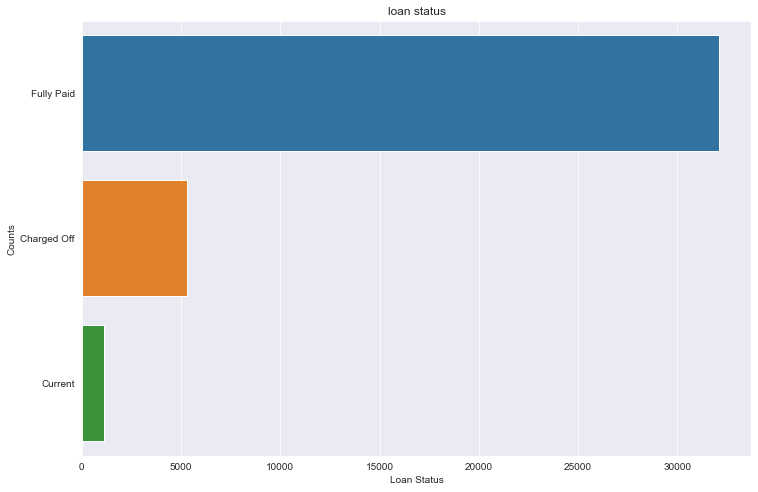

In [70]:
plt.title('loan status')
sns.countplot(y = 'loan_status',data =loan_df,order=pd.value_counts(loan_df['loan_status']).index)
# missing_value_df[missing_value_df.percent_missing > 90].plot.bar(x='column_name',y='percent_missing')
plt.ylabel('Counts')
plt.xlabel('Loan Status')
plt.show()

In [71]:
loan_df['issue_date'] = pd.to_datetime(loan_df['issue_d'],format='%b-%y')
loan_df['issue_year'] = loan_df.issue_date.dt.year
loan_df['issue_month'] = loan_df.issue_date.dt.month

In [72]:
loan_df['issue_year'].value_counts()

2011    20857
2010    11179
2009     4691
2008     1554
2007      250
Name: issue_year, dtype: int64

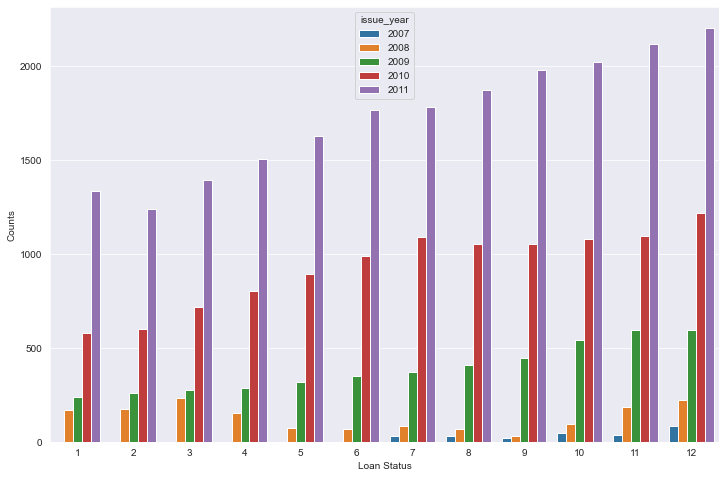

In [73]:
# plt.title('loan status')
sns.countplot(x = 'issue_month',data =loan_df,hue = 'issue_year')

# missing_value_df[missing_value_df.percent_missing > 90].plot.bar(x='column_name',y='percent_missing')
plt.ylabel('Counts')
plt.xlabel('Loan Status')
plt.show()

_Seems like for all the years, the majority of the loans were issued in the month of December_

### Analyze by State

In [74]:
df_state = loan_df.groupby('addr_state').agg({'loan_amnt':'count'})

In [75]:
df_state.reset_index(inplace=True)

In [76]:
df_state.head()

,addr_state,loan_amnt
0,AK,78
1,AL,432
2,AR,235
3,AZ,831
4,CA,6885


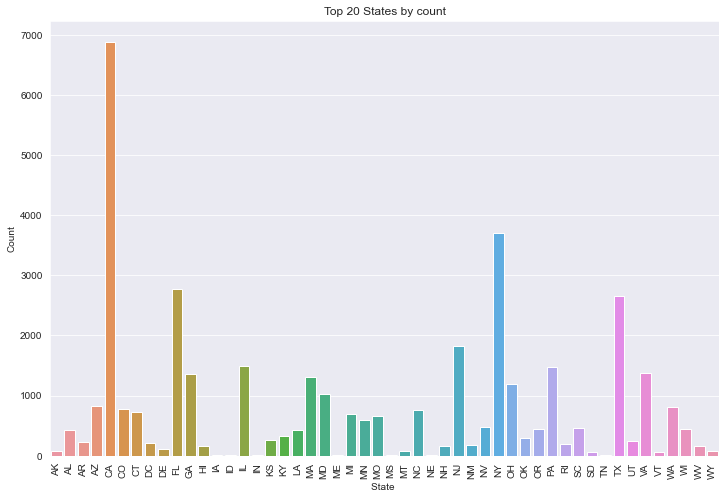

In [77]:
plt.title('Top 20 States by count')
sns.barplot(x = 'addr_state',y= 'loan_amnt',data =df_state)
plt.ylabel('Count')
plt.xlabel('State ')
plt.xticks(rotation=90)
plt.show()

Seems like the most of the loans requested are from CA followed by NY and TX .

### Lets see how does the loan repayment behavior is by the state.

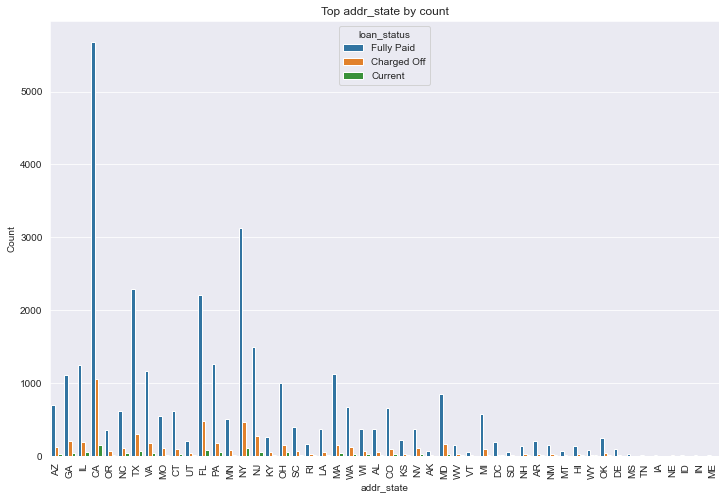

In [78]:
def plot_count_by_target(column,stacked=False):
    plt.title(f'Top {column} by count')
    sns.countplot(x = column,hue='loan_status',data =loan_df)
    plt.ylabel('Count')
    plt.xlabel(column)
    plt.xticks(rotation=90)
    plt.show()

plot_count_by_target('addr_state')

The total number of charged off loans are most in CA, followed by FL and NY.

### Term - Loan Status

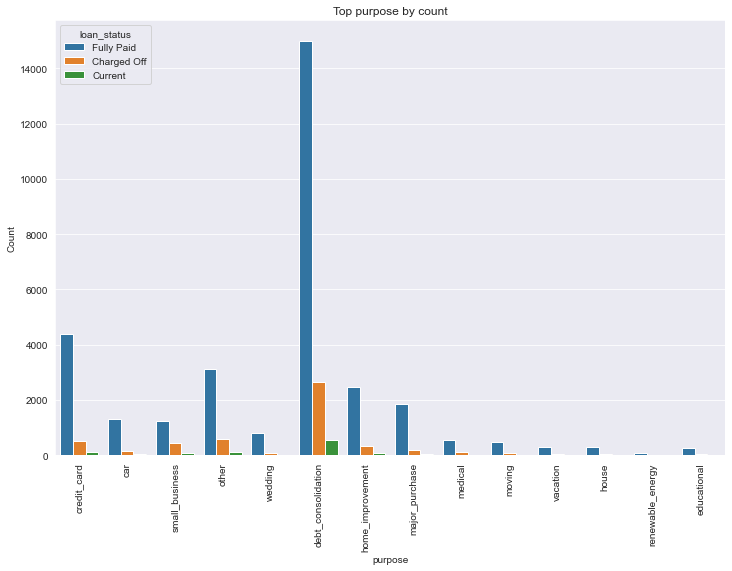

In [79]:
plot_count_by_target('purpose')

_Most of the loans that go bad are availed for the purpose of repaying debt. 
Followed by other reasons like settling credit card dues or for starting a small business or may be for home improvements._

In [80]:
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,emp_length_cleaned,int_rate_cleaned,issue_date,issue_year,issue_month
0,1077501,1296599,5000,5000,4975.0,36,10.65%,162.87,B,B2,missing,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.70%,9,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,10,10.65,2011-12-01,2011,12
1,1077430,1314167,2500,2500,2500.0,60,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,bike,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0,15.27,2011-12-01,2011,12
2,1077175,1313524,2400,2400,2400.0,36,15.96%,84.33,C,C5,missing,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,98.50%,10,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,10,15.96,2011-12-01,2011,12
3,1076863,1277178,10000,10000,10000.0,36,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,personel,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21%,37,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,10,13.49,2011-12-01,2011,12
4,1075358,1311748,3000,3000,3000.0,60,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,other,Personal,972xx,OR,17.94,0,Jan-96,0,15,0,27783,53.90%,38,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,1,12.69,2011-12-01,2011,12


In [97]:
def create_stacked_plot_by_column(segment_column,aggfunc='count'):
    loan_amount_by_purpose = pd.pivot_table(data = loan_df,values='loan_amnt',index  = segment_column,columns='loan_status',aggfunc=aggfunc)
    loan_amount_by_purpose = loan_amount_by_purpose.apply(lambda x: x/x.sum(),axis=1)
    loan_amount_by_purpose.plot(kind='bar',stacked=True,figsize = [15,8])
    plt.show()

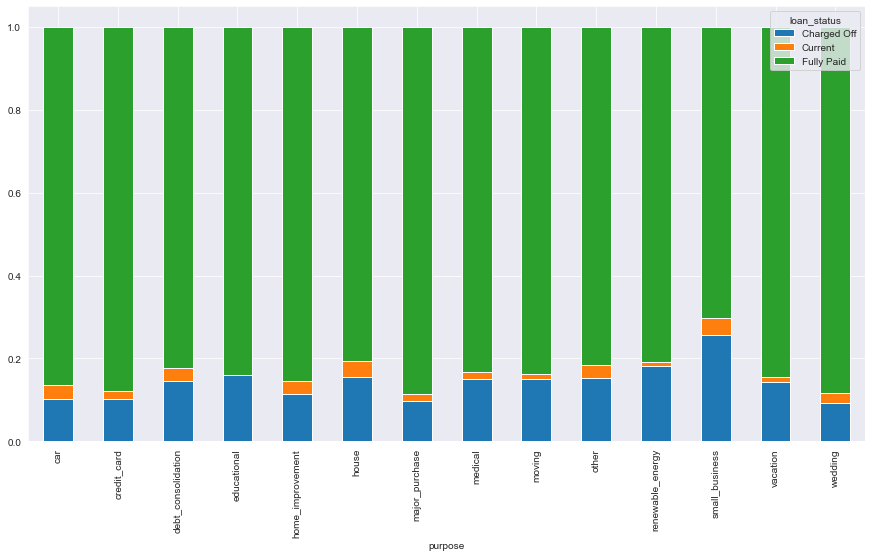

In [98]:
create_stacked_plot_by_column('purpose')

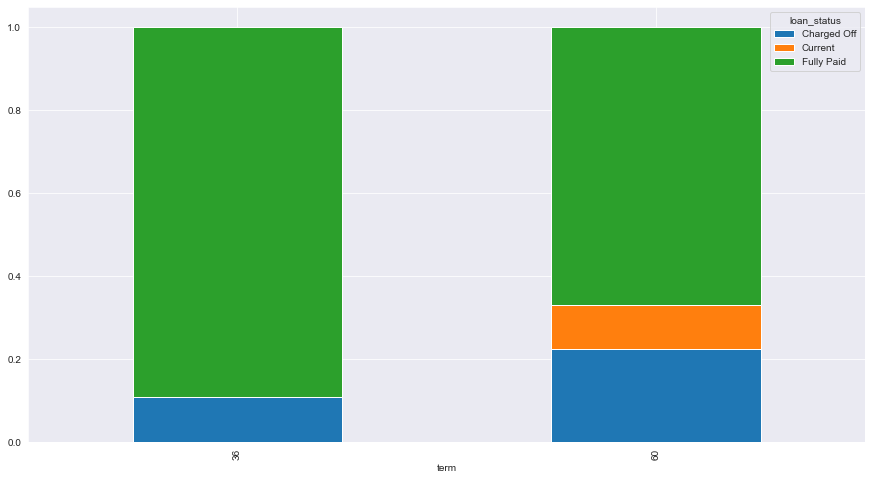

In [99]:
create_stacked_plot_by_column('term')

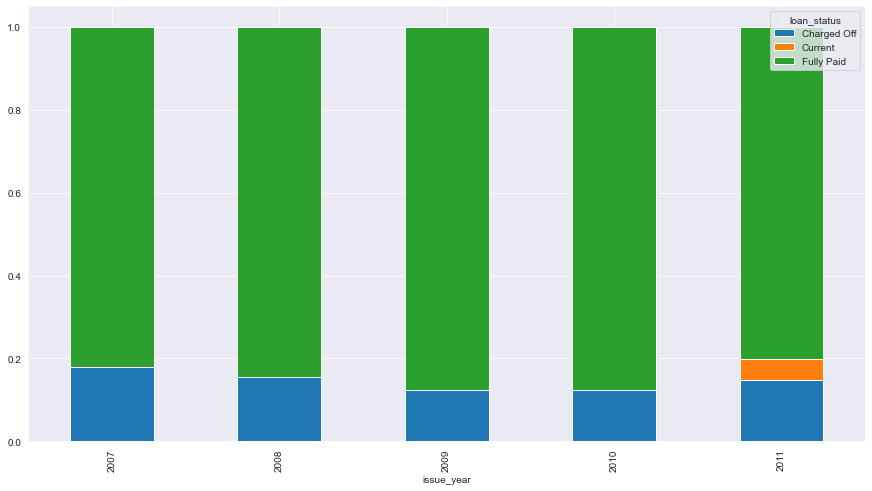

In [100]:
create_stacked_plot_by_column('issue_year')

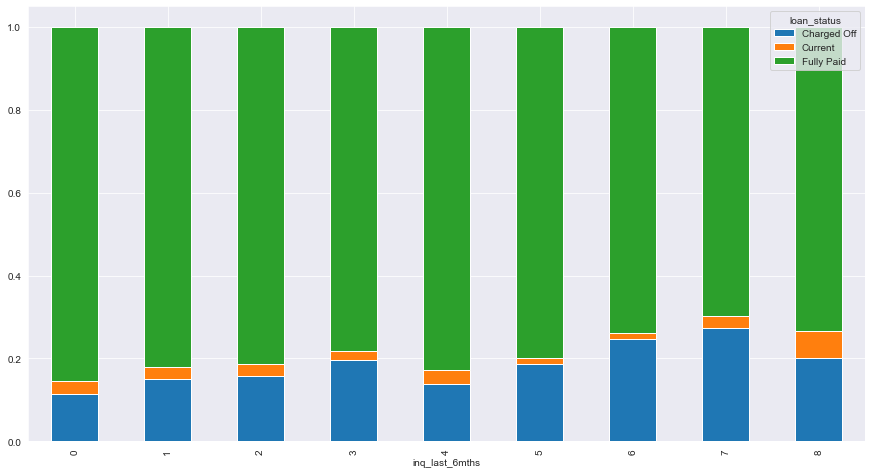

In [101]:
# Inquires in the last 6 months
create_stacked_plot_by_column('inq_last_6mths')

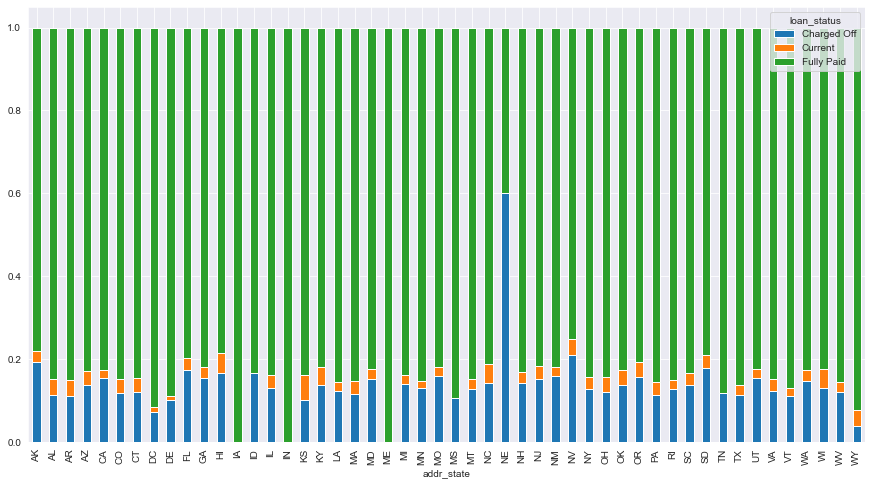

In [102]:
# Check the loan status across states
create_stacked_plot_by_column('addr_state')